# Group Project

By: Hartejh Surikapuram and Bryan Truong

# Group Contributions Statement

We, Hartejh Surikapuram and Bryan Truong (group of 2) made all the data tables/figures together. We also worked together on feature selection and the final discussion.

Hartejh led data acquisition, preparation, and cleaning. He also led the model building process for the logistic regression model. Additionally he, implemented cross-validation, the confusion matrix, and evaluating test accuracy for both models implemented in report. He also created a scatterplot and led the analysis of the groupby tables.

Bryan led the disucssion of the exploratory data analysis, including developing the histograms and analyzing the plots. He also led the model building process for the support vector machine (SVM) model and primarily developed the decision region plots.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings

# Load and Understand the Data set

In [5]:
# Load the dataset (adjust the file path as needed)
url = "https://raw.githubusercontent.com/liaochunyang/PIC16/refs/heads/main/PIC16A/data/palmer_penguins.csv"
df = pd.read_csv(url)
#Quick overview of data
#first five rows of the dataset
df.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


We first ran the dataset and analyzed by checking the column and row names, and the contents.

In [7]:
#dimensions of data set(ex: how many observations/rows and variables/columns)
print(df.shape)
print("\n")

#check data types inside data:
print(df.dtypes)
print("\n")

(344, 17)


studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object




In [8]:
#see missing values in each col
print(df.isnull().sum())

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64


We can see that the "Comments" column has 318 missing values, making it unhelpful for modeling. Other columns like "Culmen Length (mm)," "Culmen Depth (mm)," "Flipper Length (mm)," and "Body Mass (g)" also have 2 missing values each.

In [10]:
num_cols = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]

#Find Na vals
rows_with_na = df[df[num_cols].isna().any(axis=1)]

#dispaly rows with na vals
rows_with_na

#these rows are mostly Nan, all 4 variables contain Nan so would make sense to drop vs compute and add mean

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see rows 3 and 339 have missing values in "Culmen Length (mm)," "Culmen Depth (mm)," "Flipper Length (mm)," and "Body Mass (g)." I initially noticed two missing values for each of "Culmen Length (mm)," "Culmen Depth (mm)," "Flipper Length (mm)," and "Body Mass (g)", and after investigating they came from the same 2 rows. These rows are good to remove to clean data later on.

In [12]:
# Check Distributions of some categorical variables
# print(df["Species"].unique())
print(df["Species"].value_counts())

print("\n")
print(df["Island"].value_counts())

print("\n")
print(df["Region"].unique())#All come from Tranver Region, so likely wouldn't help in classification

#sex, stage and clucth completion not really useful in our case in helping classify penguin so island best option
#to use as a categorical variable
print("\n")
print(df["Sex"].value_counts())

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64


Island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


['Anvers']


Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


The dataset contains 152 Adelie, 124 Gentoo, and 68 Chinstrap penguins, showing us they are not equally distributed species. Also, all penguins happen to belong to the "Anvers" region, making it unhelpful for classification, while "Island" is a more useful categorical variable. The "Sex" column includes an invalid entry (".") that should be removed when cleaning.

### From Analysis so far: 

#### Categorical Features (Qualitative)
- Species(Penguin species)
- Region(Geographical region)
- Island(Island where the penguin was found)
- Stage(Stage of penguin’s life)
- Sex(Male/Female)
- Clutch Completion(Egg clutch status)

#### Quantitative Features (Numerical)
- Culmen Length(mm)
- Culmen Depth(mm)
- Flipper Length(mm)
- Body Mass(g)
- Delta 15 N(o/oo)
- Delta 13 C(o/oo)

#### (Not Useful for Prediction)
- studyName
- Sample Number
- Individual ID
- Date Egg
- Comments(mostly missing values)

# Train Test Split and Cleaning data

The goal of this project is to predict the species  penguin based on features such as Culmen Length and Body Mass. We will split the data into training and test data, the training and test data is split 80% to 20%. First, the training set is will try to find the relationships between the features. The test data is the other model that is never seen by the model during training and is used after to check for unseen testing data.

In [17]:
#Train-test split (80% train, 20% test)
X_train_raw, X_test_raw = train_test_split(df, test_size=0.2, stratify=df["Species"])

#not covered in class but thought better to use for reporducibility
#stratify=y: same class distribution in both training and testing sets

Some traits, such as study name, sample number, and region, are not physiological and do not aid in classifying penguin species, so they were removed. The Delta columns were also dropped as they are harder to process compared to other variables. Additionally, we removed rows with excessive missing values and an invalid entry in the "Sex" column to maintain data consistency and improve model reliability.

In [82]:
#As seen above some traits are not physiclogical traits that would aid in classifying penguin species.
#Also took out Delta columns as data is slightly harder to process compared to other variables.

def clean_data(df):#function used for reusability can apply steps to both training and test set
    """
    Cleans dataframe by dropping irrelevant columns.
    
    Parameters:
        df (DataFrame): dataframe to process (train/test).
      
    Returns:
        df_clean (DataFrame): Cleaned dataframe after being filtered.
        label_encoders (dict): Dictionary containing LabelEncoders for "Species", "Island", and "Sex".
    """
    #columns to drop
    cols_dropped = ["studyName", "Sample Number","Region", "Stage", "Individual ID", 
                    "Clutch Completion", "Date Egg", "Delta 15 N (o/oo)","Delta 13 C (o/oo)",
                    "Comments"]
    
    #sex isn't strongly correlated with species classification normally
    df_clean = df.drop(columns=cols_dropped, errors='ignore')#eliminates list comprehension need, and drops columns 

    # Drop specific rows with excessive missing values
    #in this case 2 observations/rows have 4 na values each in 4 categories.
    #df_clean = df_clean.drop(index=[3, 339], errors='ignore')
    df_clean = df_clean[df_clean["Sex"] != "."]#these is one oberservation in sex with a "." so drop that
    
    # df_clean = df_clean.dropna()#2 oberservations in data set were bad ie, missing in 4 categories, other 8 should be fine to drop would be less than 3% of dataset
    df_clean = df_clean.dropna(subset=["Sex"])#would be the same but for specificity just drop na's in sex

    label_encoders = {}
    for col in ["Species", "Island", "Sex"]:
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col])
        label_encoders[col] = le

    return df_clean, label_encoders

In [84]:
X_train_cleaned, train_encoders = clean_data(X_train_raw)
X_test_cleaned, test_encoders = clean_data(X_test_raw)

In [86]:
#To check if Na values are gone
print(X_train_cleaned.isnull().sum())
print(X_test_cleaned.isnull().sum())

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64
Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64


In [88]:
X_train_cleaned.dtypes#View if encoded

Species                  int64
Island                   int64
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                      int64
dtype: object

# Exploratory Data Analysis:

In [99]:
def df_summary(group_cols, value_cols):
    """
    Returns the mean of specified columns grouped by given categories.
    """
    return df.groupby(group_cols)[value_cols].mean().round(2)
    
df_summary(["Island","Sex"], ["Culmen Length (mm)", "Body Mass (g)"])

Culmen Length (mm)  Body Mass (g)
Island    Sex                                      
Biscoe    .                    44.50        4875.00
          FEMALE               43.31        4319.38
          MALE                 47.12        5104.52
Dream     FEMALE               42.30        3446.31
          MALE                 46.12        3987.10
Torgersen FEMALE               37.55        3395.83
          MALE                 40.59        4034.78

We can learn more about the data set by grouping the means of certain features. For our case, we grouped the means of Culmen Length and Body Mass by the penguin's Sex and their island. We can see males have larger Culmen Length and Body Mass than Females, which is consistent across all 3 islands. Additionally, we can see penguins on Biscoe Island tend to be the largest weighing while penguins from Dream island are smaller in comparison.

In [101]:
def penguin_summary_table(group_cols, value_cols):
    """
    Returns median of specified columns grouped by given categories.
    """
    return penguins.groupby(group_cols)[value_cols].median().round(2)

df_summary(["Sex", "Species"], ["Culmen Length (mm)", "Body Mass (g)"])

Culmen Length (mm)  \
Sex    Species                                                         
.      Gentoo penguin (Pygoscelis papua)                       44.50   
FEMALE Adelie Penguin (Pygoscelis adeliae)                     37.26   
       Chinstrap penguin (Pygoscelis antarctica)               46.57   
       Gentoo penguin (Pygoscelis papua)                       45.56   
MALE   Adelie Penguin (Pygoscelis adeliae)                     40.39   
       Chinstrap penguin (Pygoscelis antarctica)               51.09   
       Gentoo penguin (Pygoscelis papua)                       49.47   

                                                  Body Mass (g)  
Sex    Species                                                   
.      Gentoo penguin (Pygoscelis papua)                4875.00  
FEMALE Adelie Penguin (Pygoscelis adeliae)              3368.84  
       Chinstrap penguin (Pygoscelis antarctica)        3527.21  
       Gentoo penguin (Pygoscelis papua)                4679.74  
MALE   Adelie Penguin (Pygoscelis adeliae)              4043.49  
       Chinstrap penguin (Pygoscelis antarctica)        3938.97  
       Gentoo penguin (Pygoscelis papua)                5484.84

This function is used to see the different mean values of culmen length and body mass by species and sex. We can see males have larger Culmen Length and Body Mass than females, which is consistent across all three species. Additionally, we can see Chinstrap Penguins tend to have the longest Culmen Length at 51.18 mm, while Gentoo Penguins are the heaviest. Meanwhile, Adelie Penguins are the smallest, with a Culmen Length of 37.26 mm for females and 40.39 mm for males.

From the groupby tables, we can tell that Culmen Length, Body Mass, and Sex are useful features since they show clear patterns. For example, males are larger than females, Chinstrap penguins tend to have the longest beaks, and Gentoo penguins are the heaviest. These features are strong predictors for classifying species, but Sex alone isn't enough as there are size differences within species, and adding other features like Island might improve the accuracy of the model.

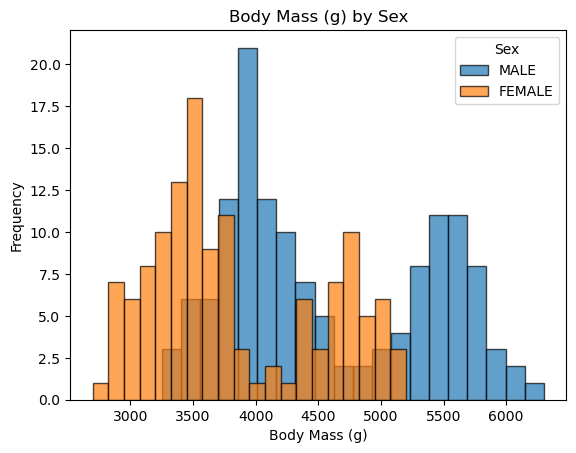

In [28]:
sex_mapping = {0: "FEMALE", 1: "MALE"}#mapping encoded sex values back to labels  

Sex_list = [sex_mapping.get(sex, "Unknown") for sex in X_train_cleaned["Sex"].unique()]#convert to readable labels  

for sex in Sex_list:
    mapped_sex = list(sex_mapping.keys())[list(sex_mapping.values()).index(sex)]
    species_data = X_train_cleaned[X_train_cleaned["Sex"] == mapped_sex]  

    plt.hist(species_data["Body Mass (g)"], bins=20, edgecolor="black",  
             label=sex, alpha=0.7)  

plt.legend(title="Sex", loc="upper right", fontsize=10)  
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.title("Body Mass (g) by Sex")

plt.show()


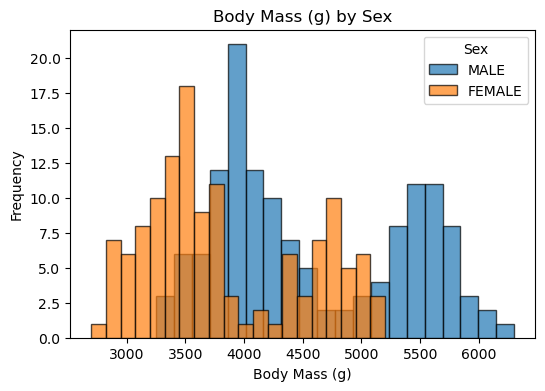

In [29]:
plt.figure(figsize=(6, 4))  

sex_mapping = {0: "FEMALE", 1: "MALE"}#mapping encoded sex values back to labels  

for sex in X_train_cleaned["Sex"].unique():  
    species_data = X_train_cleaned[X_train_cleaned["Sex"] == sex]  
    plt.hist(species_data["Body Mass (g)"], bins=20, edgecolor="black",  
             label=sex_mapping.get(sex, "Unknown"), alpha=0.7)  

plt.legend(title="Sex", loc="upper right", fontsize=10)  
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.title("Body Mass (g) by Sex")

plt.show()

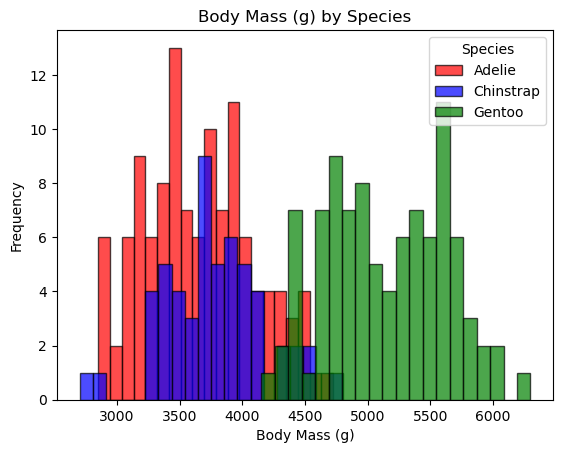

In [30]:
species_mapping = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}#mapping encoded species to names
species_colors = {"Adelie": "red", "Chinstrap": "blue", "Gentoo": "green"}#color for each species  

for species in X_train_cleaned["Species"].unique():#get unique encoded species  
    species_data = X_train_cleaned[X_train_cleaned["Species"] == species]#filter data for each species  
    species_name = species_mapping.get(species, "Unknown")  
    color = species_colors.get(species_name, "black")
    plt.hist(species_data["Body Mass (g)"], bins=20, edgecolor="black",  
             label=species_name, alpha=0.7, color=color)#plot histogram for each species  

plt.legend(title="Species", loc="upper right", fontsize=10)#add legend  
plt.xlabel("Body Mass (g)")#x-axis label  
plt.ylabel("Frequency")#y-axis label  
plt.title("Body Mass (g) by Species")#title of plot  

plt.show()#display plot  


Based on the histograms, we can see that in both plots, there are several clear trends and patters that are evident in the culmen length and body mass of the penguins based on species. These features show distinct distributions which uself in our case when distinguishing between species.

We can see that All of the Adelie Penguins have a shorter culmen length than the Gentoo penguins. The histogram shows that Adelie penguins cluster around the 35-40 mm range. They have a narrow distribution, meaning low variability is apparent, which is helpful in pointing out an obvious difference in Culemn Length which helps our medel better predict. From the body mass histogram grouped by species, we can also observe that the Gentoo penguins have a higher body mass than Chinstrap and Adelie penguins.

We can conclude that Adelie and Gentoo penguins have a clear distinct difference when it comes to its features in body mass and culmen length.

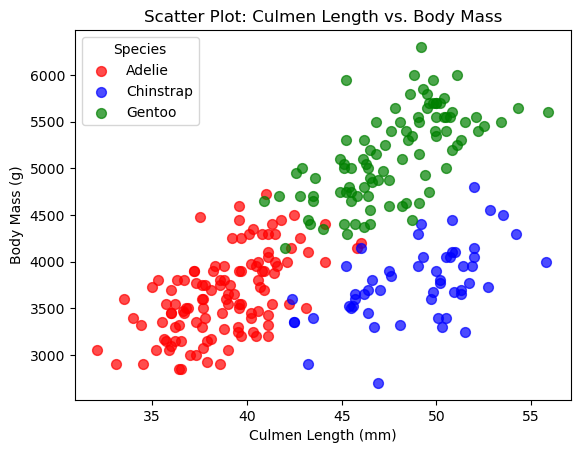

In [32]:
#mapping numerical species labels to actual names  
species_mapping = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}  
species_colors = {"Adelie": "red", "Chinstrap": "blue", "Gentoo": "green"}#assign colors  

#plot each species  
for species in X_train_cleaned["Species"].unique():#get unique encoded values  
    subset = X_train_cleaned[X_train_cleaned["Species"] == species]#get corresponding rows  

    species_name = species_mapping.get(species, "Unknown")#convert numerical label  
    color = species_colors.get(species_name, "black")#default to black if missing  

    plt.scatter(subset["Culmen Length (mm)"], subset["Body Mass (g)"],  
                label=species_name, alpha=0.7, s=50, color=color)#plot scatter  

#simple plot formatting  
plt.title("Scatter Plot: Culmen Length vs. Body Mass")  
plt.xlabel("Culmen Length (mm)")  
plt.ylabel("Body Mass (g)")  
plt.legend(title="Species")#add legend  

#display the plot  
plt.show()

Based on the Scatter plot, we can see that culmen length and body mass is a good indicator of species, they are positively correlated being that they are all separately clustered together. As the culmen length increases, the body mass also increases. The green points representing the Gentoo have the largest culmen length and heaviest body mass and clusters near the top right. Adelie have shorter culmen length and lightest body mass, clustering around the bottom left. The Chinstrap have a medium culmen length but lower bodt mass than Gentoo, clustering around the middle. The species are mostly separated, with minimal points overlapping

# Feature Selection

In [35]:
#In our current implementation, we first extract the target variable before dropping it from the feature set:

y_train = X_train_cleaned["Species"].copy()
y_test = X_test_cleaned["Species"].copy()

#used copy to avoid potential accidental changes

X_train_cleaned = X_train_cleaned.drop(columns=["Species"])
X_test_cleaned = X_test_cleaned.drop(columns=["Species"])

The two machine learning models we chose to use are the Logistic Regression Model, and the SVM Model. These two models will help us in determining the species based on quantitative features such as Culmen Length and Body Mass.

First we use Cross Validation in order to assess how the machine learning models will perform on unseen testing data. The select_best_feature_group function below will determine which feature combinations are best when predicting penguin's species.

### Cross Validation

In [38]:
def select_best_feature_group(model, X_train, y_train):
    """
    Selects best combo of features based on cross validation.

    Parameters:
        model: ML mode used for evaluation.
        X_train (Df): Training features.
        y_train (Series): Target labels.

    Returns:
        best_features (list): Feature combo that achieved highest cross validation score.
        best_score (float): Highest mean cross-validation score.
    """
    feature_groups = [
        ["Island", "Culmen Length (mm)", "Culmen Depth (mm)"],
        ["Island", "Culmen Length (mm)", "Flipper Length (mm)"],
        ["Island", "Culmen Length (mm)", "Body Mass (g)"],
        ["Island", "Culmen Depth (mm)", "Flipper Length (mm)"],
        ["Island", "Culmen Depth (mm)", "Body Mass (g)"],
        ["Island", "Flipper Length (mm)", "Body Mass (g)"],
        ["Sex", "Culmen Length (mm)", "Culmen Depth (mm)"],
        ["Sex", "Culmen Length (mm)", "Flipper Length (mm)"],
        ["Sex", "Culmen Length (mm)", "Body Mass (g)"],
        ["Sex", "Culmen Depth (mm)", "Flipper Length (mm)"],
        ["Sex", "Culmen Depth (mm)", "Body Mass (g)"],
        ["Sex", "Flipper Length (mm)", "Body Mass (g)"]
    ]#will optimize using for loop maybe later

    best_features = None
    best_score = float("-inf")#could have used 0 but might not work for negative metrics applied

    for features in feature_groups:#X_train[features] is subset of training data with our current feature combination.
        score = np.mean(cross_val_score(model, X_train[features], y_train, cv=3))
        if score > best_score:#compare the score with the best score seen so far:
            best_score = score
            best_features = features#If the current feature combination has a higher score than best_score, update

    return best_features, best_score

## Modeling

In [40]:
# Feature selection per model
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

logistic_model = LogisticRegression(max_iter = 1000, solver='liblinear')#more iterations more optimal, but runs fairly slow past 200 iterations also changes solver to liblinear
best_features_logistic, cv_score_logistic = select_best_feature_group(logistic_model, X_train_cleaned, y_train)


svm_model = SVC(kernel="linear")#seperate using linear kernel
best_features_svm, cv_score_svm = select_best_feature_group(svm_model, X_train_cleaned, y_train)

We used Logistic Regression because it is a simple, interpretable model that works well for classification problems with linearly separable data. The SVM with a linear kernel was used to find the best possible decision boundary, as it maximizes the margin between classes.

In [42]:
def train_and_evaluate(model, best_features, X_train, X_test, y_train, y_test):
    """
    Trains model with best features and evaluates test accuracy and confusion matrix.

    Parameters:
        model: ML model used for training.
        best_features (list): Selected feature combo.
        X_train (Df): Training features.
        X_test (Df): Test features.
        y_train (Series): Training labels.
        y_test (Series): Test labels.

    Returns:
        test_score (float): Accuracy of model on test set.
        conf_matrix (ndarray): Confusion matrix comparing predictions to actual labels.
    """
    X_train_final = X_train[best_features]#select best features
    X_test_final = X_test[best_features]

    #scale numerical features
    scaler = StandardScaler() #standardizes numerical columns to have mean 0 and standard deviation 1.
    
    numerical_features = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
    #select only the numerical features that exist in best_features
    num_cols = []
    for col in best_features:
        if col in numerical_features:
            num_cols.append(col) 

    X_train_final = X_train_final.copy()
    X_test_final = X_test_final.copy()
    X_train_final[num_cols] = scaler.fit_transform(X_train_final[num_cols])
    X_test_final[num_cols] = scaler.transform(X_test_final[num_cols])

    model.fit(X_train_final, y_train)
    test_score = model.score(X_test_final, y_test)
    y_pred = model.predict(X_test_final)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return test_score, conf_matrix

Function trains machine learning model using the best selected features, scales numerical columns for consistency, and evaluates the model's performance on a test set. Finally, it returns the test accuracy and a confusion matrix to assess classification performance.

In [44]:
logistic_test_score, logistic_conf_matrix = train_and_evaluate(
    model=logistic_model, 
    best_features=best_features_logistic, 
    X_train=X_train_cleaned, 
    X_test=X_test_cleaned, 
    y_train=y_train, 
    y_test=y_test)

svm_test_score, svm_conf_matrix = train_and_evaluate(
    model=svm_model, 
    best_features=best_features_svm, 
    X_train=X_train_cleaned, 
    X_test=X_test_cleaned, 
    y_train=y_train, 
    y_test=y_test)

In [45]:
print("Logistic Regression")
print("Selected Features:", best_features_logistic)
print("Cross-Validation Score:", cv_score_logistic)
print("Test Set Accuracy:", logistic_test_score)
print("\nConfusion Matrix:\n", logistic_conf_matrix)

print("SVM")
print("Selected Features:", best_features_svm)
print("Cross-Validation Score:", cv_score_svm)
print("Test Set Accuracy:", svm_test_score)
print("\nConfusion Matrix:\n", svm_conf_matrix)


Logistic Regression
Selected Features: ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']
Cross-Validation Score: 0.9625468164794008
Test Set Accuracy: 0.9848484848484849

Confusion Matrix:
 [[28  0  0]
 [ 1 13  0]
 [ 0  0 24]]
SVM
Selected Features: ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
Cross-Validation Score: 0.9850187265917603
Test Set Accuracy: 0.9696969696969697

Confusion Matrix:
 [[28  0  0]
 [ 1 13  0]
 [ 1  0 23]]


## Model Comparison

### Support Vector Machine (SVM) 
Selected Features:  
- Sex  
- Culmen Length (mm)  
- Culmen Depth (mm)  

A Cross-Validation Score of .985 indicates that the model correctly predicted the species 98.5% percent of the time during cross-validation. This demonstrates its strong ability to generalize to unseen data and prevent overfitting.  

Its Test Accuracy Score was lower at 97%, meaning most of the penguins' species were predicted correctly in the test set.  

### Logistic Regression
Selected Features:  
- Sex  
- Culmen Length (mm)  
- Culmen Depth (mm)  

The Logistic Regression model achieved a Cross-Validation Score of 96.6%, which is lower than SVM, but it had a higher Test Accuracy of 98.5%.

This suggests that while SVM performed better during cross-validation, Logistic Regression generalized slightly better to test data. The difference in scores may be due to model variance, dataset characteristics, or the optimization process used during training rather than overfitting.

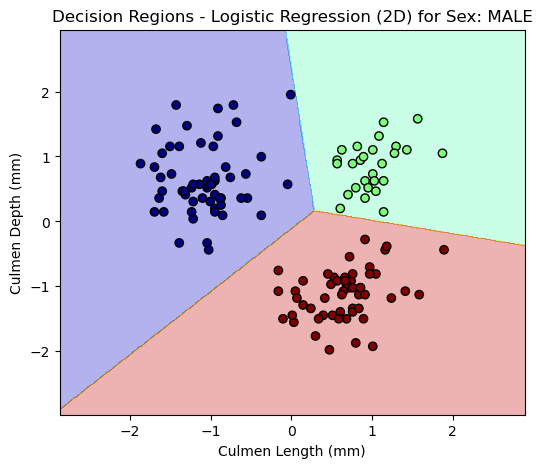

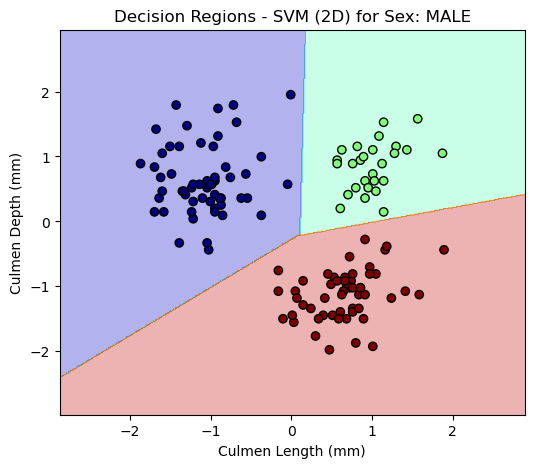

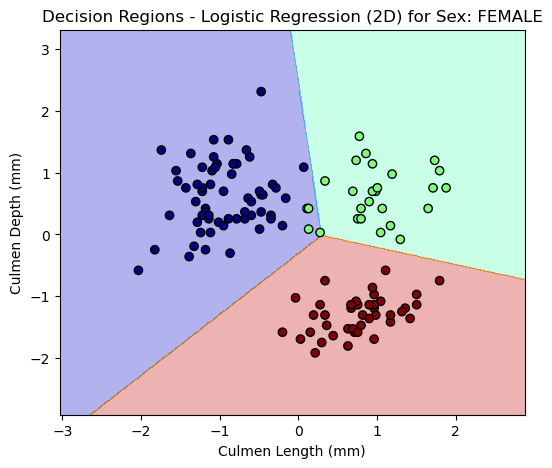

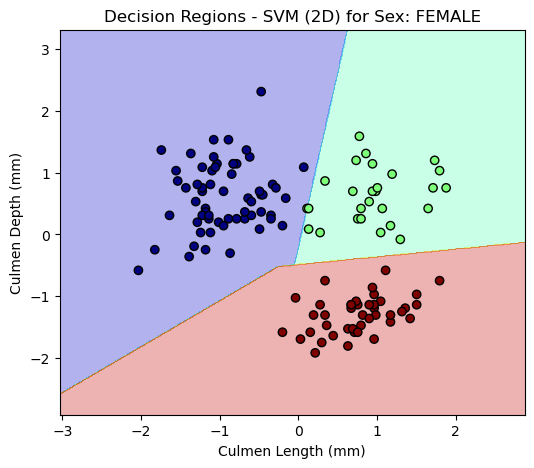

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Ensure best_features_logistic is properly defined before this check
best_features_logistic = ["Culmen Length (mm)", "Culmen Depth (mm)"]

# Set features for plotting
if "Culmen Length (mm)" in best_features_logistic and "Culmen Depth (mm)" in best_features_logistic:
    plot_feats = ["Culmen Length (mm)", "Culmen Depth (mm)"]  # Set features for plotting
else:
    plot_feats = ["Culmen Length (mm)", "Culmen Depth (mm)"]  # Default to Culmen features

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, title, resolution=0.02):
    """
    Plots decision boundaries for a classifier using two numerical features.

    Parameters:
        X (array-like): Feature array with shape [n_samples, 2].
        y (array-like): Target labels with shape [n_samples,].
        classifier: Trained classifier with a predict() method.
        title (str): Title for the plot.
        resolution (float): Step size for the decision boundary mesh.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Set x-axis range
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Set y-axis range
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 501),
                         np.linspace(y_min, y_max, 501))  # Create mesh grid
    XY = np.c_[xx.ravel(), yy.ravel()]  # Flatten for prediction
    Z = classifier.predict(XY)  # Predict decision boundary
    Z = Z.reshape(xx.shape)  # Reshape back to grid

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap="jet", alpha=0.3)  # Plot decision boundaries
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="jet")  # Plot points
    plt.xlabel("Culmen Length (mm)")
    plt.ylabel("Culmen Depth (mm)")
    plt.title(title)  # Set title
    plt.show()  # Display plot

# Mapping for sex values
sex_mapping = {0: "FEMALE", 1: "MALE"}

# Iterate through unique sex categories
for s in X_train_cleaned["Sex"].unique():
    subset = X_train_cleaned[X_train_cleaned["Sex"] == s]  # Filter by sex
    y_subset = y_train.loc[subset.index]  # Target labels
    X_sex = subset[plot_feats]  # Select plotting features

    # Scale the features
    scaler_plot = StandardScaler()
    X_sex_scaled = scaler_plot.fit_transform(X_sex.values)

    # Train Logistic Regression Model
    log_reg_2d = LogisticRegression(max_iter=500, solver='liblinear')
    log_reg_2d.fit(X_sex_scaled, y_subset.values)

    # Train SVM Model
    svm_2d = SVC(kernel="linear")
    svm_2d.fit(X_sex_scaled, y_subset.values)

    # Get mapped sex label
    sex_label = sex_mapping.get(s, str(s))

    # Plot both decision regions
    plot_decision_regions(X_sex_scaled, y_subset.values, log_reg_2d,
                          f"Decision Regions - Logistic Regression (2D) for Sex: {sex_label}")

    plot_decision_regions(X_sex_scaled, y_subset.values, svm_2d,
                          f"Decision Regions - SVM (2D) for Sex: {sex_label}")


The decision region plots show that both the Logistic Regression and Support Vector Machine model were able to almost always predict the species for both male and female correctly. Though, all the models do incorrectly interpret Gentoo as Chinstraps. But the Adelie and Chinstrap are always correct, they do not interfere with any other regions in any of the models. 

## Discussion:

- First Model we used was the Logistic Regression model using Sex, Culmen Length (mm), and Culmen Depth (mm) to achieve a Cross-Validation Score of 0.966 and Test Accuracy of 0.985. The high cross-validation score indicates that the model generalizes well to unseen data, and the 98.5% test accuracy indicates that all species in the test set were correctly classified. Sex is most likely an influential feature, and Culmen Length and Culmen Depth proved to be valuable predictors as they're features that differ across different species. These outputs make the Logistic Regression model reliable when predicting penguin species.

- The second model, being the Support Vector Machine, was a perfect model with a cross-validation score of 0.985, higher than Logistic Regression. The model used Island, Culmen Length (mm), and Culmen Depth (mm) to classify species. It was able to correctly predict 97% of the penguins' species, making it a highly valuable model. Although the CV score was higher, the test accuracy score ended up being lower at 0.97, maybe indicating some overfitting problems.

### Improvements
- Performing a test with more data can improve the model as it can better estimate the coefficients for each feature.  
- Adding more relevant features could enhance prediction accuracy.  
- Potentially increasing the number of iterations may refine the model's learning.  
- Retuning the C parameter can optimize the model's regularization and performance.  